# This notebook demonstrates Decision Threes using SkLearn

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from decision_trees import DecisionTree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time

In [2]:
df = pd.read_csv('newhousing.txt', delimiter=" ")

In [3]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,pricelevel
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,above
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,above
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,above
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,above
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,above


In [4]:
print('Dimensions of dataset:', df.shape)

Dimensions of dataset: (506, 14)


In [5]:
print('Instances of classes:')
prices = df['pricelevel'].value_counts()
prices

Instances of classes:


above    274
below    232
Name: pricelevel, dtype: int64

In [6]:
print('percentages of spam vs. non-spam in dataset:')
print('percentage of spam data:', round(prices[1]/(sum(prices)),2), '%')
print('percentage of non-spam data:', round(prices[0]/(sum(prices)),2), '%')

percentages of spam vs. non-spam in dataset:
percentage of spam data: 0.46 %
percentage of non-spam data: 0.54 %


In [7]:
print('Analytics of explanatory variables:')
df.describe()

Analytics of explanatory variables:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


#### Splitting data into test- and train:

We are using `stratify` because the classes are not balanced. This gives the splitting an equal percentage amount of the spam class. SVM has a very long runtime. That is the reason why we dont have that many lines of training data:

In [16]:
X, y = df.loc[:, df.columns != 'pricelevel'], df.loc[:, df.columns == 'pricelevel']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=400/df.shape[0], random_state=0, shuffle = True, 
                                                    stratify = y)

In [9]:
print('Instances of classes in training data:')
prices = y_train['pricelevel'].value_counts()
prices

Instances of classes in training data:


above    217
below    183
Name: pricelevel, dtype: int64

#### Training Decision Three:

In [17]:
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train).reshape(len(y_train,)), np.array(y_test).reshape(len(y_test,))

In [11]:
classifier = DecisionTreeClassifier(random_state = 0)

In [12]:
param_grid = {'max_depth':range(1,15), 'criterion': ['gini', 'entropy'], 'min_samples_split': range(1,20),
             'min_samples_leaf': range(1,10)}
grid = GridSearchCV(classifier, param_grid, verbose=5, n_jobs = -1, return_train_score = True, refit = True)
classifier_best = grid.fit(X_train, y_train)
classifier_best

Fitting 5 folds for each of 4788 candidates, totalling 23940 fits


C:\Users\madsm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ nan 0.78 0.78 ... 0.76 0.76 0.77]
  warnings.warn(
C:\Users\madsm\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [     nan 0.801875 0.801875 ... 0.888125 0.888125 0.883125]
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 20)},
             return_train_score=True, verbose=5)

In [13]:
classifier_best.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 14}

In [18]:
dt = DecisionTree(X_train, y_train)
dt.best_params

Fitting 5 folds for each of 2128 candidates, totalling 10640 fits


{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'random_state': 0}

In [82]:
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 4, min_samples_split = 14, random_state = 1)

In [83]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=14, random_state=1)

[Text(504.76973684210526, 996.6, 'LSTAT <= -0.696\n400\n[217, 183]\nabove'),
 Text(183.55263157894737, 815.4000000000001, 'DIS <= 2.497\n122\n[121, 1]\nabove'),
 Text(110.13157894736841, 634.2, '118\n[118, 0]\nabove'),
 Text(256.9736842105263, 634.2, '4\n[3, 1]\nabove'),
 Text(825.9868421052631, 815.4000000000001, 'LSTAT <= -0.137\n278\n[96, 182]\nbelow'),
 Text(403.8157894736842, 634.2, 'RM <= -0.234\n89\n[54, 35]\nabove'),
 Text(146.8421052631579, 453.0, 'PTRATIO <= -0.742\n40\n[12, 28]\nbelow'),
 Text(73.42105263157895, 271.79999999999995, '8\n[6, 2]\nabove'),
 Text(220.26315789473682, 271.79999999999995, 'CRIM <= -0.405\n32\n[6, 26]\nbelow'),
 Text(146.8421052631579, 90.59999999999991, '16\n[0, 16]\nbelow'),
 Text(293.6842105263158, 90.59999999999991, '16\n[6, 10]\nbelow'),
 Text(660.7894736842105, 453.0, 'TAX <= -0.468\n49\n[42, 7]\nabove'),
 Text(513.9473684210526, 271.79999999999995, 'B <= 0.428\n33\n[32, 1]\nabove'),
 Text(440.52631578947364, 90.59999999999991, '29\n[29, 0]\nab

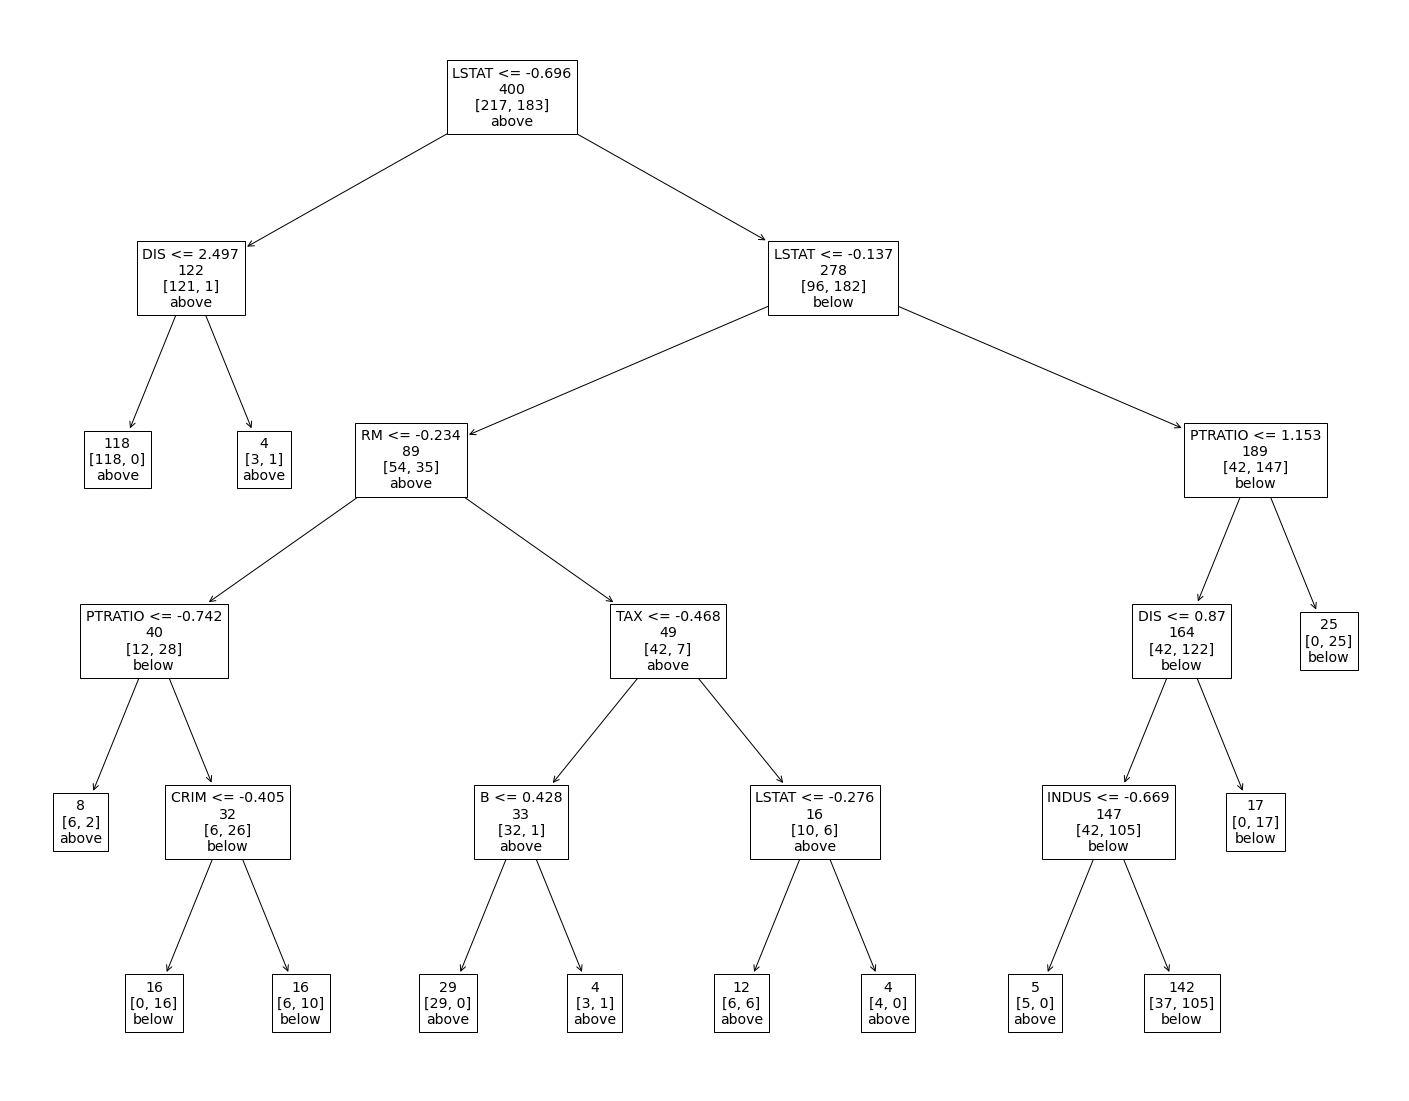

In [84]:
fig = plt.figure(figsize=(25,20))
plot_tree(classifier,
                   label = 'none',
                   impurity = False,
                   feature_names=list(df.columns)[:-1],  
                   class_names=list(df['pricelevel'].unique()),
                   filled=False)

#### Predicting

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
print('testing accuracy:', accuracy_score(y_pred, y_test))

testing accuracy: 0.7830188679245284


In [19]:
confusion_matrix(y_test, y_pred)

array([[38, 19],
       [ 4, 45]], dtype=int64)

In [20]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n       above       0.90      0.67      0.77        57\n       below       0.70      0.92      0.80        49\n\n    accuracy                           0.78       106\n   macro avg       0.80      0.79      0.78       106\nweighted avg       0.81      0.78      0.78       106\n'

# Random Forest Classifier

The gridsearch below is huge. It can take a while to tune the hyperparameters.

In [62]:
classifier = RandomForestClassifier(random_state = 1)

param_grid = {'max_depth':range(2,10), 'criterion': ['gini', 'entropy'], 'min_samples_split': range(2,20),
             'min_samples_leaf': range(1,10), 'n_estimators': range(500, 1500, 500), 'max_features': ['auto', 'sqrt']}
grid = GridSearchCV(classifier, param_grid, n_jobs = -1, return_train_score = True, refit = True, verbose = 2)
classifier_best = grid.fit(X_train, y_train)
classifier_best

Wall time: 0 ns
Fitting 5 folds for each of 10368 candidates, totalling 51840 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 20),
                         'n_estimators': range(500, 1500, 500)},
             return_train_score=True, verbose=2)

In [63]:
classifier_best.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [11]:
classifier = RandomForestClassifier(criterion = 'entropy', max_depth = 9, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 1000, random_state = 1)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=1000,
                       random_state=1)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
print('testing accuracy:', accuracy_score(y_pred, y_test))

testing accuracy: 0.8113207547169812


### Feature importance

In [30]:
df_test = pd.DataFrame({'variables': df.columns[:-1], 'importance': classifier.feature_importances_})

In [31]:
df_test = df_test.sort_values(by = 'importance', ascending = True)

<BarContainer object of 13 artists>

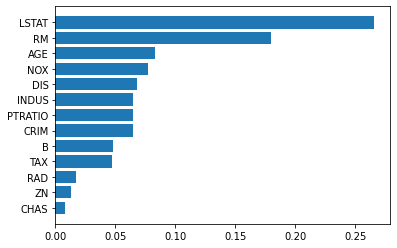

In [33]:
fig = plt.figure(figsize=(25,20))
variable_names = list(df_test.variables)
plt.barh(variable_names, df_test.importance)